In [1]:
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re

In [2]:
path = "/Users/mayongzhi/Desktop/bioinformatic_project/genotyping_tool/F38_otof-Rprimer.ab1"

In [3]:
record = SeqIO.read(path, "abi")
record

SeqRecord(seq=Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA'), id='F38_otof-Rprimer', name='F38_otof-Rprimer', description='', dbxrefs=[])

In [4]:
sequence = record.seq
sequence

Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA')

In [5]:
pattern = "ATGCCGTGTCAGGCCGGCTAGGGTGGGGAGAAGACAGG"

In [6]:
channels = []
for d in [1,2,3,4]:
    channels += [f'DATA{d}']
channels

['DATA1', 'DATA2', 'DATA3', 'DATA4']

In [7]:
matches = re.finditer(pattern, str(sequence))

for match in matches:
    start = match.start()
    end = match.end()
    matched_sequence = sequence[start:end]
    print(f"Found '{matched_sequence}' at position {start+1}-{end} in the sequence.")

Found 'ATGCCGTGTCAGGCCGGCTAGGGTGGGGAGAAGACAGG' at position 497-534 in the sequence.


In [8]:
sub_trace = defaultdict(list)
for c in channels:
    sub_trace[c] = record.annotations['abif_raw'][c][start:end]
print("Sub trace data", sub_trace)

Sub trace data defaultdict(<class 'list'>, {'DATA1': (37, 36, 28, 25, 34, 10, 27, 29, 18, 22, 19, 17, 6, 24, 16, 5, 18, 15, 11, 10, 5, 17, -2, 12, 3, 13, 13, 10, 9, 2, 4, 17, 5, 14, 11, -6, 2, 12), 'DATA2': (51, 32, 37, 40, 34, 47, 37, 31, 39, 22, 31, 27, 28, 22, 19, 28, 24, 25, 32, 27, 20, 20, 24, 21, 27, 16, 15, 20, 15, 20, 30, 20, 27, 10, 21, 22, 17, 9), 'DATA3': (16, 18, 14, 24, 31, 9, 4, 21, 17, 42, 15, 17, 11, 16, 11, -1, 12, 1, 27, 0, 24, 16, -16, -1, -15, 21, 20, 7, -7, 6, 7, 5, 28, 29, -1, -18, 14, 35), 'DATA4': (63, 26, 35, 29, 30, 24, 21, 24, 14, 28, 21, 16, 12, 10, 17, 10, 17, 6, 12, 5, 8, 5, 13, 13, 10, 7, 10, 7, 8, 12, 9, 4, 13, -2, -8, -16, -1, -5)})


In [9]:
a = pd.DataFrame(sub_trace, columns = sub_trace.keys())
a.head()

,DATA1,DATA2,DATA3,DATA4
0,37,51,16,63
1,36,32,18,26
2,28,37,14,35
3,25,40,24,29
4,34,34,31,30


In [45]:
a_nt = a.rename({'DATA1': 'T',
          'DATA2': 'C',
          'DATA3': 'G',
          'DATA4': 'A'},
          axis = 1)
a_nt


,T,C,G,A
0,37,51,16,63
1,36,32,18,26
2,28,37,14,35
3,25,40,24,29
4,34,34,31,30
5,10,47,9,24
6,27,37,4,21
7,29,31,21,24
8,18,39,17,14
9,22,22,42,28


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


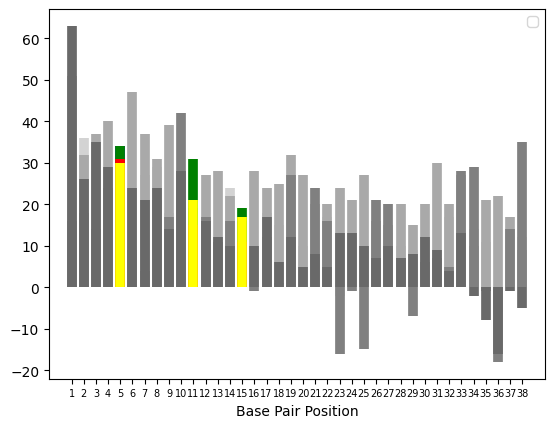

In [52]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969']
colorful_colors = ['#0000FF', '#008000', '#FF0000', '#FFFF00']  # Blue, Green, Red, Yellow

x_values = np.arange(1,len(sub_trace['DATA1'])+1,1)

for i in range(len(x_values)):
    if x_values[i] not in [5,11,15]:
        for j, sub in enumerate(a_nt.columns):
            color_index = i % len(colors)
            plt.vlines(x = x_values[i], ymin = 0, ymax = a_nt[sub].iloc[i], color = colors[j],  linewidth = 7) 
    else:
        for j, sub in enumerate(a_nt.columns):
            color_index = i % len(colors)
            plt.vlines(x = x_values[i], ymin = 0, ymax = a_nt[sub].iloc[i], color = colorful_colors[j],  linewidth = 7) 
        
# Set x-axis label and y-axis label
plt.xlabel('Base Pair Position')
plt.legend()
plt.xticks(x_values, fontsize = 7)
# Show plot
plt.show()

ValueError: could not broadcast input array from shape (0,) into shape (1,)

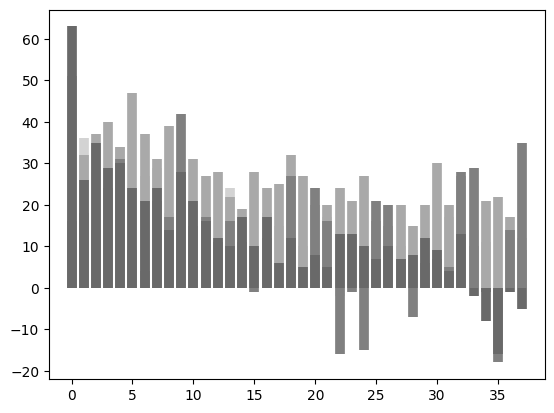

In [35]:
# colors = [tuple(np.random.rand(3)) for _ in range(len(channels))]
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969']
x_values = np.arange(1,len(sub_trace['DATA1']),1)

for i, c in enumerate(list(a.columns)):
    plt.vlines(x = (range(len(sub_trace[c])) if x !=9),
               ymin=0, 
               ymax= sub_trace[c],
               label = str(c),
               color=colors[i], 
               linewidth=7)
    
colorful_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00']
for i, c in enumerate(channels):
    plt.vlines(x = 10,
               ymin = 0,
               ymax = sub_trace[10],
               color = colorful_colors[i],
               label = str(c),
               linewidth = 7)
# Set x-axis label and y-axis label
plt.xlabel('Base Pair Position')
plt.legend()
plt.xticks(x_values, fontsize = 7)
# Show plot
plt.show()